In [1]:
%cd ..

d:\github\ripple_heterogeneity\python


In [2]:
import pandas as pd
import numpy as np 
import glob
import matplotlib.pyplot as plt

import hdf5storage
import h5py
import scipy.io as sio

import sys,os

import functions,loading

import nelpy as nel  # main nelpy imports
import nelpy.plotting as npl  # optional plotting import

import math
import statistics
from mpl_toolkits.axes_grid1 import make_axes_locatable


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [40]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "svg.fonttype": 'none'
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

# plt.rcParams['svg.fonttype'] = 'none'

%config InlineBackend.figure_format = 'retina'

fig_save_path = 'G:/My Drive/post_doc/ripple_diversity/project_log'

In [91]:
def load_stimint(basepath):
    filename = glob.glob(basepath+os.sep+'stimInt.mat')[0]
    # check if saved file exists
    if not os.path.exists(filename):
        warnings.warn("file does not exist")
        return np.nan
    
    data = sio.loadmat(filename)
    return data['stimInt']['On'][0][0]

def load_postrials(basepath):
    filename = glob.glob(basepath+os.sep+'posTrials.mat')[0]
    # check if saved file exists
    if not os.path.exists(filename):
        warnings.warn("file does not exist")
        return np.nan,np.nan
    
    data = sio.loadmat(filename)
    return data['posTrials'][0][0],data['posTrials'][0][1]

In [165]:
basepath = r'A:\OptoMECLEC\OML18\day1'

# channel info
nChannels, fs, fs_dat, shank_to_channel = functions.loadXML(basepath)
# ripple epochs
ripples = loading.load_ripples_events(basepath)
# spike data and a lot more
cell_metrics,cell_metrics_data = loading.load_cell_metrics(basepath)
# rem shifting
df,data_dict = loading.load_theta_rem_shift(basepath)

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:709: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [166]:
# load stimulation
stim_on = load_stimint(basepath)
mec_silence_epochs = nel.EpochArray(stim_on)
print(mec_silence_epochs)

# load position
outbound,inbound = load_postrials(basepath)
# pos = np.vstack([outbound,inbound])
# idx = np.argsort(pos[:,0])
# pos = pos[idx,:]

fs_pos = 1/statistics.mode(np.diff(outbound[:,0]))

pos_outbound = nel.AnalogSignalArray(data=[outbound[:,1]],timestamps=outbound[:,0], fs=fs_pos)
pos_inbound = nel.AnalogSignalArray(data=[inbound[:,1]],timestamps=inbound[:,0], fs=fs_pos)

print(pos_outbound)
print(pos_inbound)

# make spike train object
st = nel.SpikeTrainArray(timestamps=np.array(cell_metrics_data['spikes'],dtype="object"), fs=fs_dat)

<EpochArray at 0x1ae23cb0760: 41 epochs> of length 30:30:176 minutes
<AnalogSignalArray at 0x1ae23cb0160: 1 signals (43 segments)> for a total of 35:22:843 minutes
<AnalogSignalArray at 0x1ae22220100: 1 signals (43 segments)> for a total of 29:14:183 minutes


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


# here, we can see that mec silencing happens during the outbound interval on the linear track

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support


Text(0.5, 1.0, 'mec_silence_epochs pos_outbound')

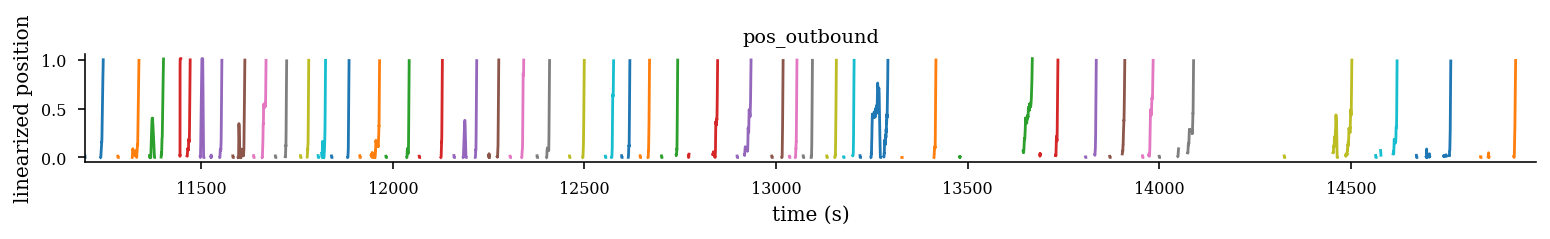

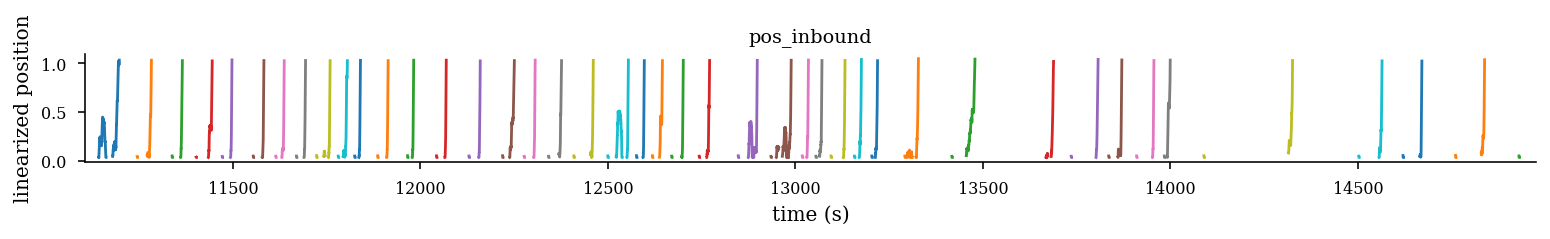

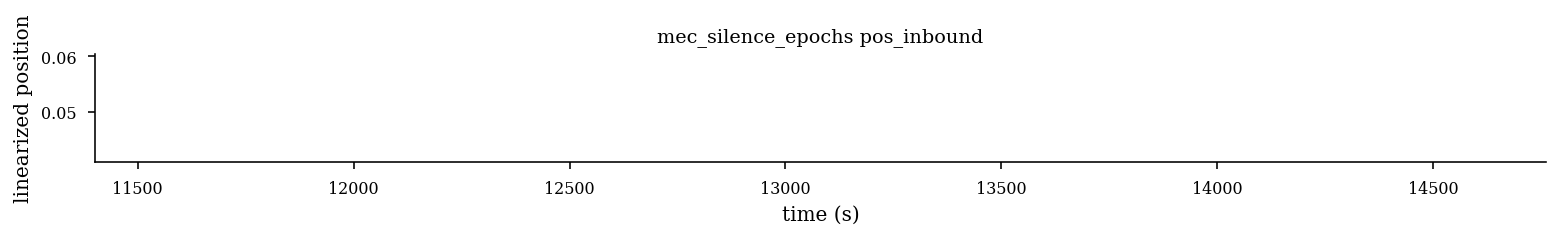

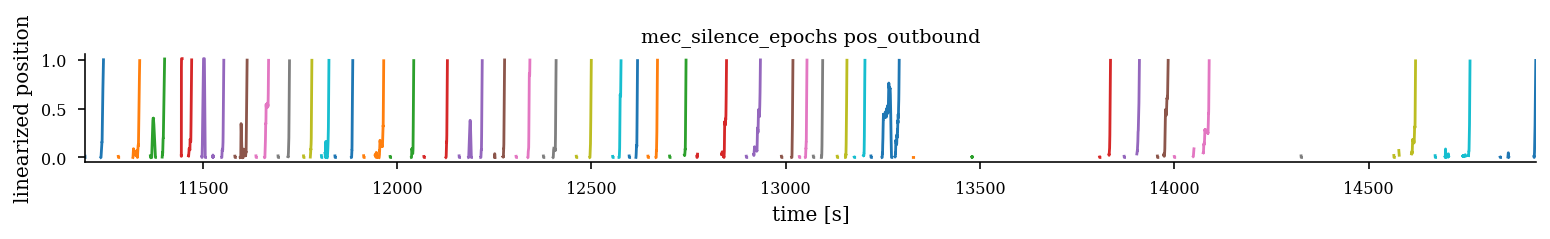

In [167]:
fig = plt.figure(figsize=(13,1))
npl.plot(pos_outbound)
ax = plt.gca()
ax.set_ylabel('linearized position')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)
ax.set_title('pos_outbound')

fig = plt.figure(figsize=(13,1))
npl.plot(pos_inbound)
ax = plt.gca()
ax.set_ylabel('linearized position')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)
ax.set_title('pos_inbound')


fig = plt.figure(figsize=(13,1))
npl.plot(pos_inbound[mec_silence_epochs])
ax = plt.gca()
ax.set_ylabel('linearized position')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)
ax.set_title('mec_silence_epochs pos_inbound')

ig = plt.figure(figsize=(13,1))
npl.plot(pos_outbound[mec_silence_epochs])
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('linearized position')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)
ax.set_title('mec_silence_epochs pos_outbound')


AttributeError: 'NoneType' object has no attribute 'plot'

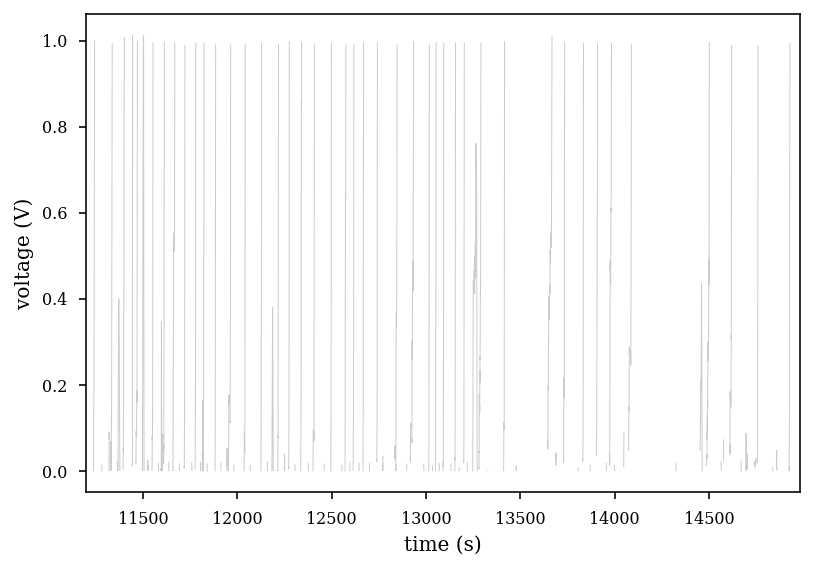

In [113]:
pos_outbound.data

ax = npl.plot(pos_outbound, lw=0.5, c='0.8')
unit_id = 9
_, pos_at_spikes = pos_outbound.asarray(at=st[:,unit_id].time)
ax.plot(pos_at_spikes[0,:], pos_at_spikes[1,:], '.')
ax.set_aspect('equal')

In [168]:
df,data_dict = loading.load_theta_rem_shift(basepath)


In [169]:
unit_ids_to_keep = list(np.where((cell_metrics.brainRegion == "CA1") & (cell_metrics.putativeCellType == "Pyramidal Cell"))[0]+1)
st_ca1 = st._unit_subset(unit_ids_to_keep)

# unit_ids_to_keep = list(np.where((cell_metrics.brainRegion == "CA1") &
#     (cell_metrics.putativeCellType == "Pyramidal Cell") &
#     (df.rem_shift == 1))[0]+1)
# st_rem_shift = st._unit_subset(unit_ids_to_keep)

# unit_ids_to_keep = list(np.where((cell_metrics.brainRegion == "CA1") &
#     (cell_metrics.putativeCellType == "Pyramidal Cell") &
#     (df.non_rem_shift == 1))[0]+1)
# st_non_rem_shift = st._unit_subset(unit_ids_to_keep)

# unit_ids_to_keep = list(np.where(cell_metrics.putativeCellType == "Pyramidal Cell")[0]+1)
# st_pyr = st._unit_subset(unit_ids_to_keep)

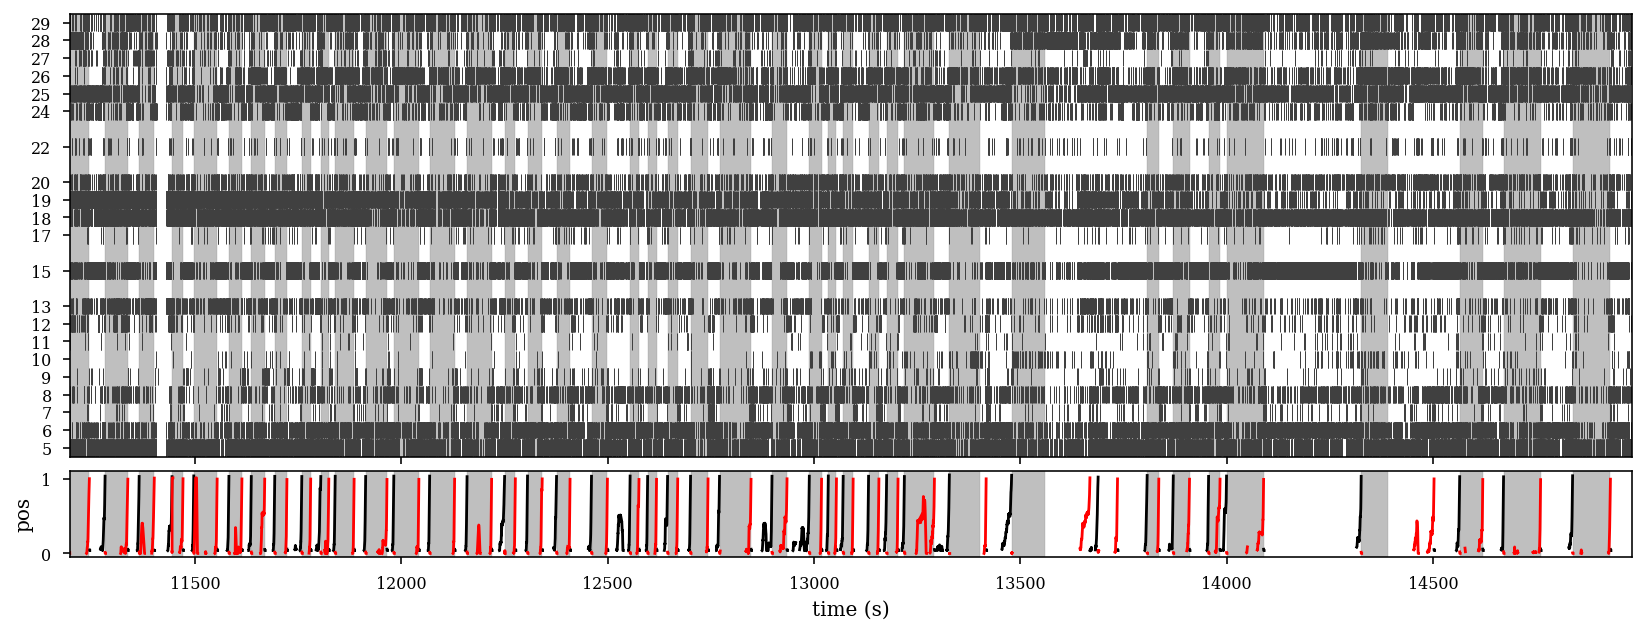

In [172]:
with npl.FigureManager(show=True, figsize=(14,5)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)

    npl.rasterplot(st_ca1, lw=0.5, ax=ax)
    # npl.rasterplot(st_non_rem_shift, lw=0.5, ax=ax,color=npl.colors.sweet.green)
    
    npl.epochplot(mec_silence_epochs)

    divider = make_axes_locatable(ax)

    ax_pos = divider.append_axes("bottom", size=0.6, pad=0.1)
    npl.plot(pos_inbound, ax=ax_pos,color='k')
    npl.plot(pos_outbound, ax=ax_pos,color='r')
    npl.epochplot(mec_silence_epochs, ax=ax_pos)


    xlims = (pos_outbound.time.min(), pos_outbound.time.max())

    ax.set_xlim(xlims)
    ax_pos.set_xlim(xlims)
    ax_pos.set_ylabel('pos')

    plt.savefig(os.path.join(fig_save_path,'opto_silence_raster.pdf'),dpi=300,bbox_inches='tight')

14982.234466666667